# Minicurso de análise de dados em Python
Prof. Dr. Ednaldo Gomes da Silva (ednaldo.gomes@ifsertao-pe.edu.br)

IFSertaoPE Campus Petrolina - 2025

## Estudo de caso: análise de gorjetas

### Passo 1: Entendendo o caso

Você é analista de dados que foi contratado para auxliar o gestor de um restaurante de sua cidade. O público que frequenta o restaurante costuma dar gorjetas para os garçons que prestam um bom atendimento. Seu objetivo é analisar a base de dados fornecida pelo gestor e tentar fornecer insights relevantes para o negócio.

### Passo 2: Colete as informações

Importe as bibliotecas Pandas, Matplotlib e Seaborn. Carregue o dataset built-in do Seaborn chamado 'tips' e visualise as cinco primeiras linhas do dataset

In [105]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [106]:
# base de dados original
data = sns.load_dataset('tips')

# base de dados que será manipulada
df = data.copy(deep=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [107]:
df.columns
mapper = {'total_bill':'conta', 'tip':'gorjeta', 'sex':'genero',
           'smoker':'fumante', 'day':'dia', 'time':'hora', 'size':'mesa'}

In [108]:
# transformações
# renomear colunas
df.rename(mapper=mapper, axis=1, inplace=True)
df.head()

,conta,gorjeta,genero,fumante,dia,hora,mesa
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [109]:
df['hora'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [110]:
# alterar valores categóricos das colunas
df['genero'].replace(to_replace={'Female':'F', 'Male':'M'}, inplace=True)
df['fumante'].replace(to_replace={'No':'N', 'Yes':'S'}, inplace=True)
df['dia'].replace(to_replace={'Sun':'Dom', 'Sat':'Sab', 'Thur':'Qui', 'Fri':'Sex'}, inplace=True)
df['hora'].replace(to_replace={'Dinner':'Jantar', 'Lunch':'Almoco'}, inplace=True)

df.sample(10)

,conta,gorjeta,genero,fumante,dia,hora,mesa
141,34.30,6.70,M,N,Qui,Almoco,6
238,35.83,4.67,F,N,Sab,Jantar,3
93,16.32,4.30,F,S,Sex,Jantar,2
4,24.59,3.61,F,N,Dom,Jantar,4
92,5.75,1.00,F,S,Sex,Jantar,2
86,13.03,2.00,M,N,Qui,Almoco,2
76,17.92,3.08,M,S,Sab,Jantar,2
136,10.33,2.00,F,N,Qui,Almoco,2
142,41.19,5.00,M,N,Qui,Almoco,5
201,12.74,2.01,F,S,Qui,Almoco,2


### Passo 3: Explore os dados

Use das funções .info() e .describe() do Pandas para entender a base dados

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   conta    244 non-null    float64 
 1   gorjeta  244 non-null    float64 
 2   genero   244 non-null    category
 3   fumante  244 non-null    category
 4   dia      244 non-null    category
 5   hora     244 non-null    category
 6   mesa     244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [112]:
# # categorical describe
df.describe(include='category').T

,count,unique,top,freq
genero,244,2,M,157
fumante,244,2,N,151
dia,244,4,Sab,87
hora,244,2,Jantar,176


In [113]:
# nuumerical describe
df[['conta', 'gorjeta']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
conta,244.0,19.79,8.90,3.07,13.35,17.8,24.13,50.81
gorjeta,244.0,3.00,1.38,1.00,2.00,2.9,3.56,10.00


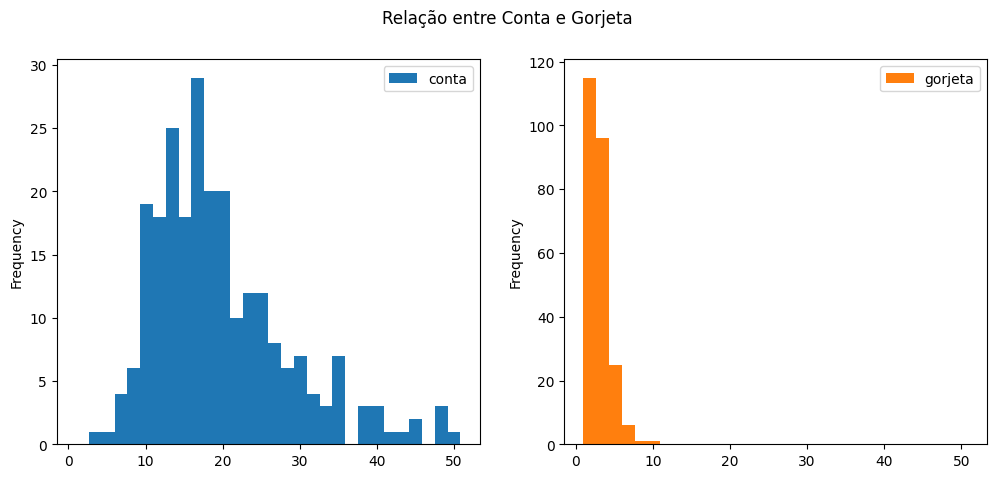

In [114]:
# built-in do pandas
df[['conta', 'gorjeta']].plot(kind='hist', subplots=True, layout=(1,2), bins=30, 
                              sharex=False, sharey=False, figsize=(12,5),
                              title='Relação entre Conta e Gorjeta');

Crie um histograma com linha de densidade das variáveis conta e gorjeta. Investigue se existe alguma relação entre as variávieis

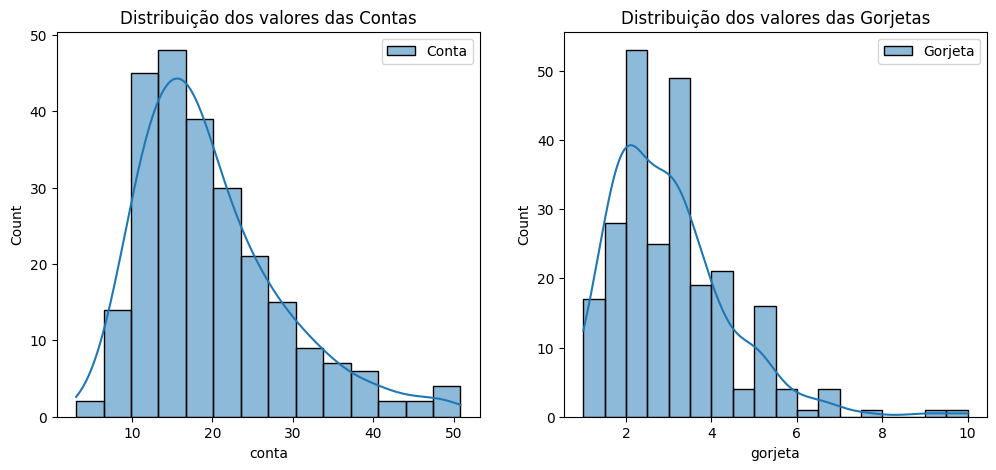

In [115]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(data=df, x='conta', kde=True, label='Conta')
plt.title('Distribuição dos valores das Contas')
plt.legend()

plt.subplot(122)
sns.histplot(data=df, x='gorjeta', kde=True, label='Gorjeta')
plt.title('Distribuição dos valores das Gorjetas')
plt.legend();

### Passo 4: Faça perguntas relevantes para o negócio

- Quantos homens e mulheres frequentam o restaurante?
- Quantos fumantes frequentam o restaurante?
- Quais os dias com maior e menor movimento?
- Que horário tem mais pessoas?
- Qual a frequência do número de lugares que são mais ocupados?

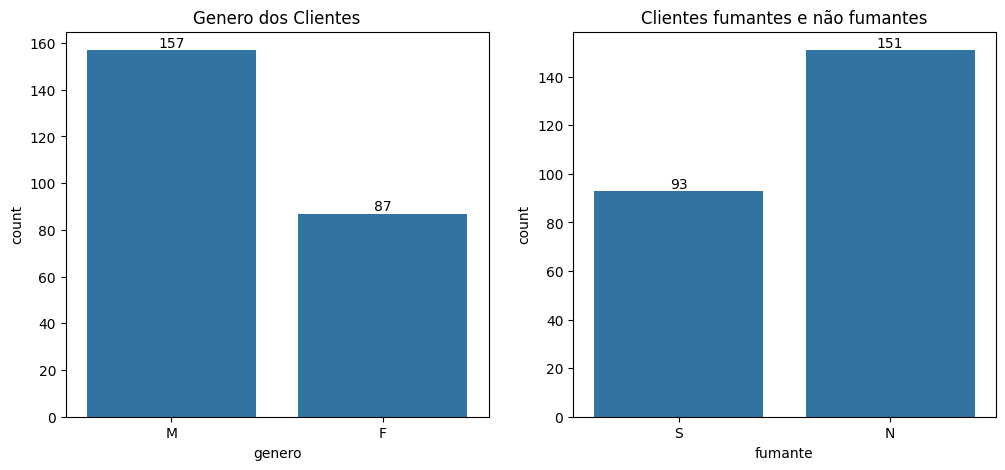

In [116]:
# frequentadores do restaurante (genero)
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax = sns.countplot(data=df, x='genero')
plt.title('Genero dos Clientes')
for i in ax.containers:
    ax.bar_label(i)

# frequentadores do restaurante (fumantes)
plt.subplot(122)
ax = sns.countplot(data=df, x='fumante')
plt.title('Clientes fumantes e não fumantes')
for i in ax.containers:
    ax.bar_label(i);

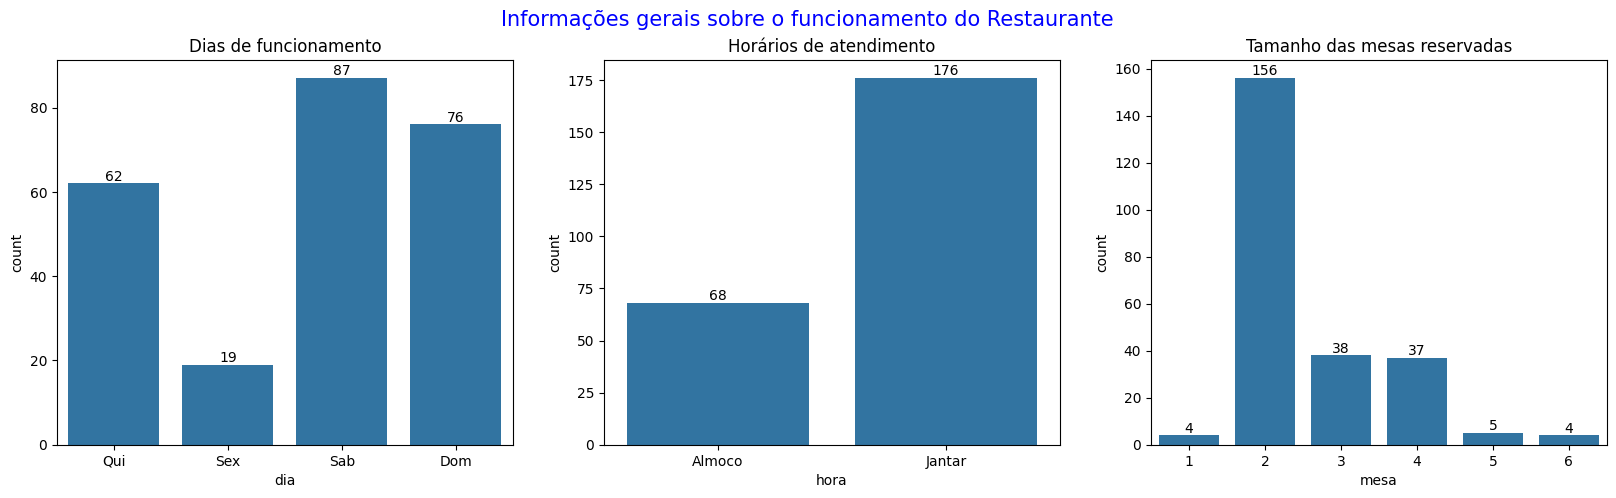

In [117]:
# frequentadores do restaurante (dias de funcionamento)
plt.figure(figsize=(20, 5))
plt.subplot(131)
ax = sns.countplot(data=df, x='dia')
plt.title('Dias de funcionamento')
for i in ax.containers:
    ax.bar_label(i)

# frequentadores do restaurante (horário de funcionamento)
plt.subplot(132)
ax = sns.countplot(data=df, x='hora')
plt.title('Horários de atendimento')
for i in ax.containers:
    ax.bar_label(i)

# frequentadores do restaurante (mesas mais reservadas)
plt.subplot(133)
ax = sns.countplot(data=df, x='mesa')
plt.title('Tamanho das mesas reservadas');
for i in ax.containers:
    ax.bar_label(i)
    
plt.suptitle('Informações gerais sobre o funcionamento do Restaurante', fontsize=15, color='blue');

Perguntas de negócio

- Quantos homens e mulheres são fumantes?
- Existe um dia específico que é mais frequentado por homens/mulheres fumantes?
- Existe um dia específico que é mais frequentado por fumantes?
- Existem mais homens ou mulheres no almoço e na janta?
- A janta é a refeição predominante todos os dias?
- Existem mais fumantes ou não fumantes no almoço ou na janta?

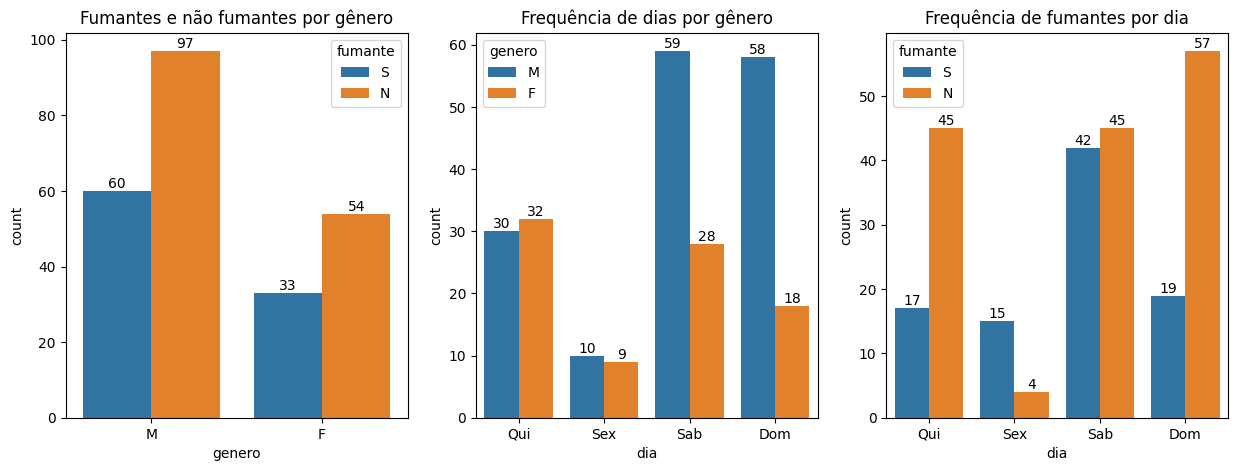

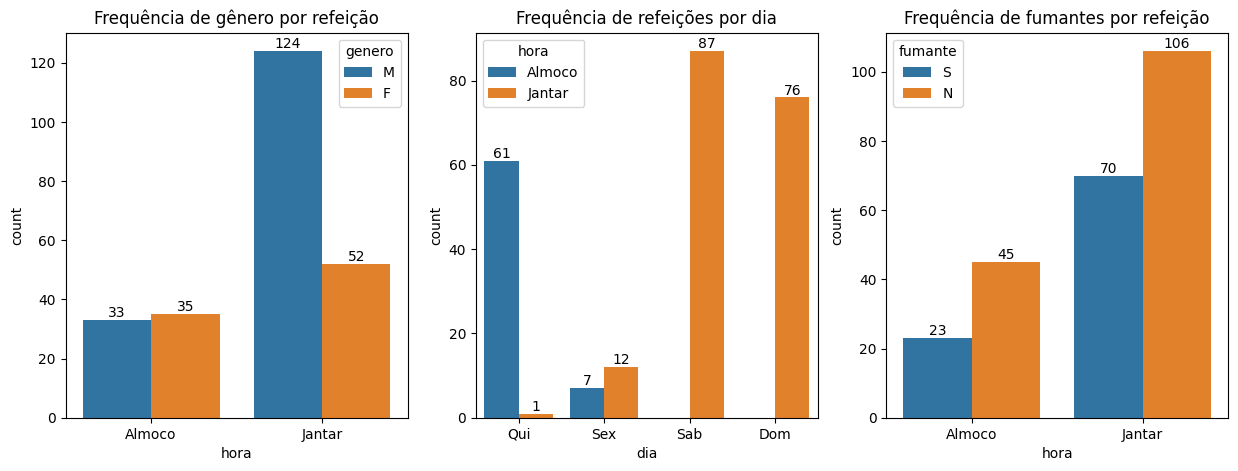

In [118]:
plt.figure(figsize=(15, 5))
# Quantos homens e mulheres são fumantes?
plt.subplot(131)
ax = sns.countplot(data=df, x='genero', hue='fumante')
plt.title('Fumantes e não fumantes por gênero')
for i in ax.containers:
    ax.bar_label(i)

# Existe um dia específico que é mais frequentado por homens/mulheres?
plt.subplot(132)
ax = sns.countplot(data=df, hue='genero', x='dia')
plt.title('Frequência de dias por gênero')
for i in ax.containers:
    ax.bar_label(i)

# Existe um dia específico que é mais frequentado por fumantes?
plt.subplot(133)
ax = sns.countplot(data=df, x='dia', hue='fumante')
plt.title('Frequência de fumantes por dia')
for i in ax.containers:
    ax.bar_label(i)

plt.figure(figsize=(15, 5))
# Existem mais homens ou mulheres no almoço e na janta?
plt.subplot(131)
ax = sns.countplot(data=df, x='hora', hue='genero')
plt.title('Frequência de gênero por refeição')
for i in ax.containers:
    ax.bar_label(i)

# A janta é a refeição predominante todos os dias?
plt.subplot(132)
ax = sns.countplot(data=df, x='dia', hue='hora')
plt.title('Frequência de refeições por dia')
for i in ax.containers:
    ax.bar_label(i)

# Existem mais fumantes ou não fumantes no almoço ou na janta?
plt.subplot(133)
ax = sns.countplot(data=df, x='hora', hue='fumante')
plt.title('Frequência de fumantes por refeição')
for i in ax.containers:
    ax.bar_label(i)

Perguntas de negócio

- Existe alguma relação entre o valor da conta e o valor da gorjeta?
- Quem dá mais gorjeta, homens ou mulheres?
- Quem dá mais gorjeta, fumantes ou não fumantes?
- Em que dia da semana a gorjeta é mais alta? em que horário? Varia com gênero ou tabagismo?
- Qual é o tipo de mesa que dá mais gorjeta?


In [119]:
corr = df[['conta', 'gorjeta']].corr(method='pearson')

r2_sexo_geral = corr.iloc[0,1]**2

In [120]:
df_masc = df.loc[df['genero']=='M'] 
df_fem = df.loc[df['genero']=='F']

corr_masc = df_masc[['conta', 'gorjeta']].corr(method='pearson')
corr_fem = df_fem[['conta', 'gorjeta']].corr(method='pearson')

r2_sexo_masc = corr_masc.iloc[0,1]**2
r2_sexo_fem = corr_fem.iloc[0,1]**2

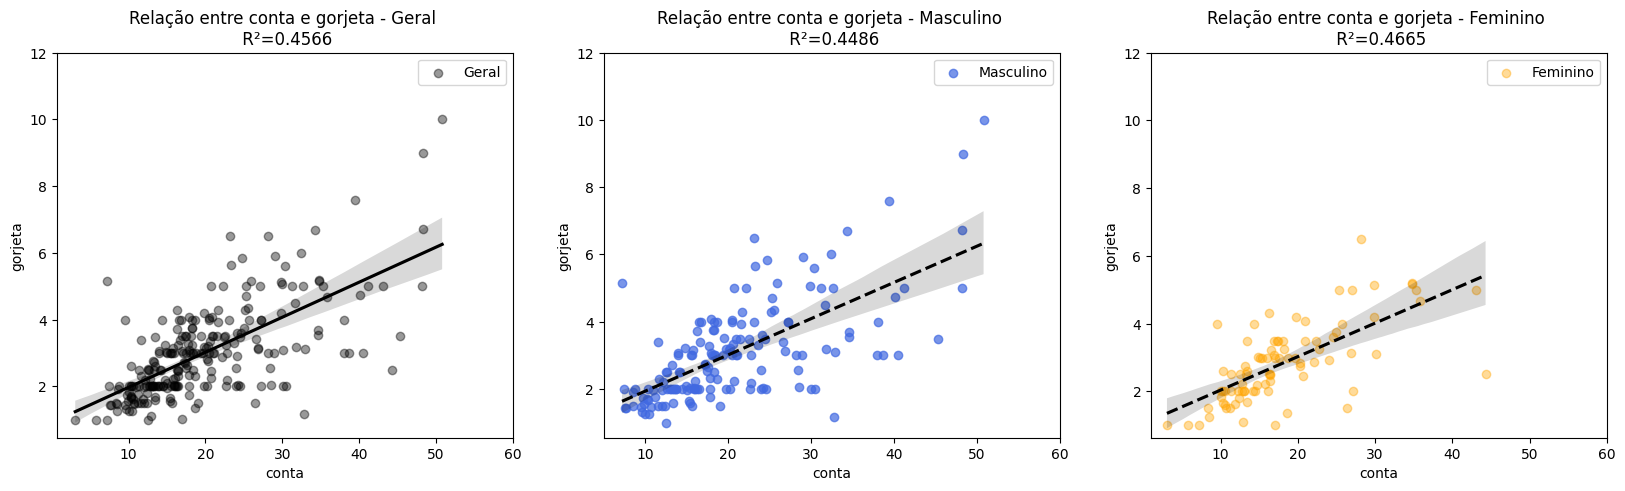

In [121]:
plt.figure(figsize=(20, 5))
# Existe alguma relação entre o valor da conta e o valor da gorjeta?
plt.subplot(131)
sns.regplot(data=df, x='conta', y='gorjeta', scatter_kws={'color':'black', 'alpha':0.4},
            line_kws={'color':'black'}, label='Geral')
plt.title(f'Relação entre conta e gorjeta - Geral \n R²={r2_sexo_geral:.4f}')
plt.xlim(right=60)
plt.ylim(top=12)
plt.legend()

# Quem dá mais gorjeta, homens ou mulheres?
plt.subplot(132)
sns.regplot(data=df[df['genero'] == 'M'],
            x='conta', y='gorjeta', 
            label='Masculino', scatter_kws={'color':'royalblue', 'alpha':0.7},
            line_kws={'color':'black', 'ls': '--'})
plt.title(
    f'Relação entre conta e gorjeta - Masculino \n R²={r2_sexo_masc:.4f}')
plt.legend()
plt.xlim(right=60)
plt.ylim(top=12)

plt.subplot(133)
sns.regplot(data=df[df['genero'] == 'F'], x='conta', y='gorjeta', 
            label='Feminino', scatter_kws={'color':'orange', 'alpha':0.4},
            line_kws={'color':'black', 'ls': '--'})
plt.title(f'Relação entre conta e gorjeta - Feminino \n R²={r2_sexo_fem:.4f}')
plt.legend()
plt.xlim(right=60)
plt.ylim(top=12);


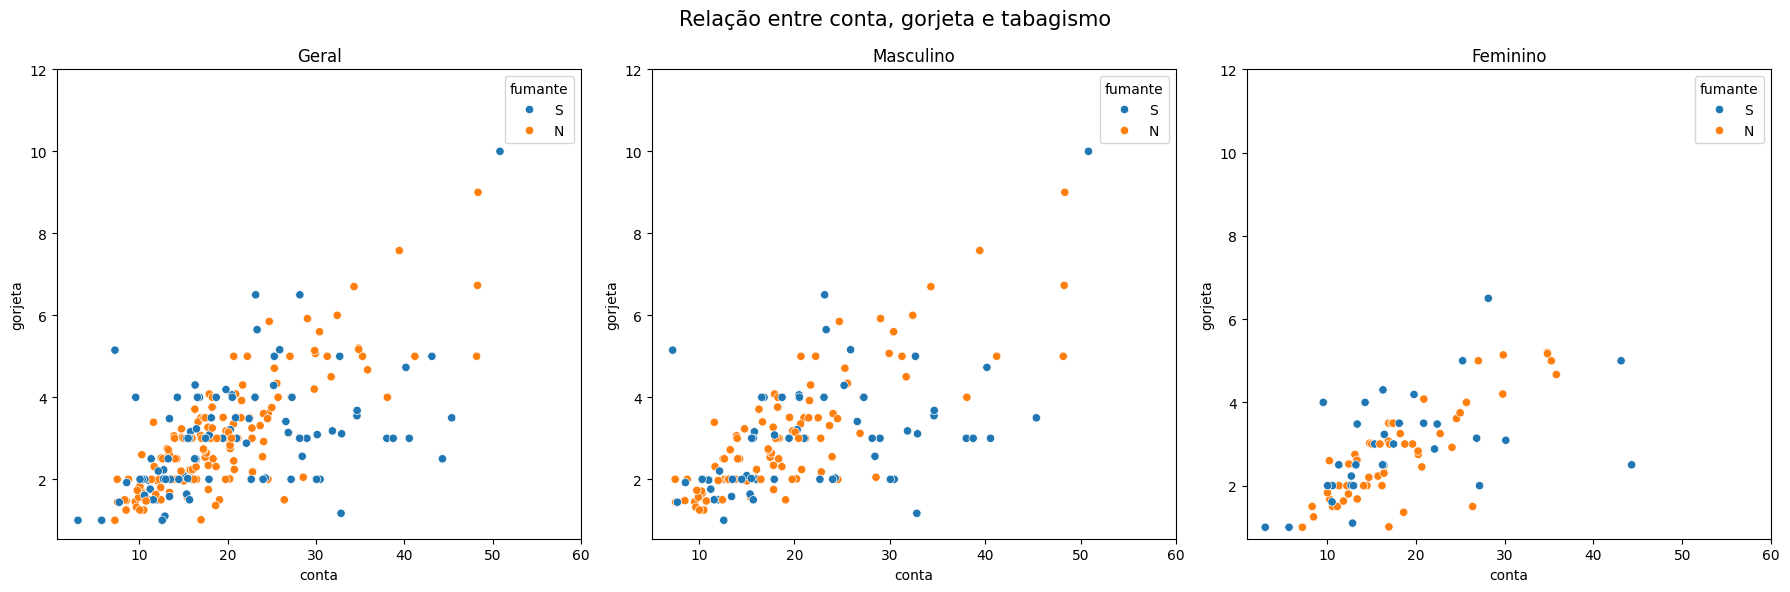

In [122]:
plt.figure(figsize=(18, 6))
# Existe alguma relação entre o valor da conta e o tabagismo?
plt.subplot(131)
sns.scatterplot(data=df, x='conta', y='gorjeta', hue='fumante')
plt.title(f'Geral')
plt.xlim(right=60)
plt.ylim(top=12)

# Quem dá mais gorjeta, homens ou mulheres?
plt.subplot(132)
sns.scatterplot(data=df_masc, x='conta', y='gorjeta', hue='fumante')
plt.title(f'Masculino')
plt.xlim(right=60)
plt.ylim(top=12)

plt.subplot(133)
sns.scatterplot(data=df_fem, x='conta', y='gorjeta', hue='fumante')
plt.title(f'Feminino')
plt.xlim(right=60)
plt.ylim(top=12)
plt.suptitle('Relação entre conta, gorjeta e tabagismo', fontsize=15, weight=True)
plt.tight_layout();

In [123]:
gorjeta_masc = df_masc.groupby(by = ['genero', 'fumante', 'dia', 'hora'])['gorjeta']\
.agg(['count', 'mean', 'min', 'max'])

gorjeta_masc.style.highlight_max(color='green', axis=0)\
.highlight_min(color='red', axis=0)\
.format(precision=2)

In [124]:
gorjeta_fem = df_fem.groupby(by=['genero', 'fumante', 'dia', 'hora'])['gorjeta']\
.agg(['count', 'mean', 'min', 'max'])

gorjeta_fem.style.highlight_max(color='blue', axis=0)\
.highlight_min(color='purple', axis=0)\
.format(precision=2)